# Importing Classical Libraries

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import numpy as np
import pandas as pd
import pylatexenc
import time

# Importing Quantum Computing Libraries

In [2]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import VQC, QSVC
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel


## Loading Dataset using pandas library

In [3]:
df=pd.read_csv('african_crises.csv')

## Label Encoding
### What is Label Encoding?
Label encoding converts categorical values into numerical values, allowing machine learning models to process them.


In [4]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in df.select_dtypes(include=['object']).columns:
  df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df.head(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,3,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,3,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,3,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,3,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


# Scaling The Dataset

I created a StandardScaler object to standardize the numerical features in my dataset.

In [5]:
# Create a Standard Scalar object
scalar = StandardScaler()

# Apply scaling to numerical columns
df[['exch_usd', 'inflation_annual_cpi']] = scalar.fit_transform(df[['exch_usd', 'inflation_annual_cpi']])

# Display the updated DataFrame
df.head(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,3,0,1870,1,-0.386713,0,0,0.0,-0.030863,0,0,0,0
1,1,3,0,1871,0,-0.386708,0,0,0.0,-0.030848,0,0,0,1
2,1,3,0,1872,0,-0.386712,0,0,0.0,-0.030874,0,0,0,1
3,1,3,0,1873,0,-0.386718,0,0,0.0,-0.030852,0,0,0,1
4,1,3,0,1874,0,-0.386721,0,0,0.0,-0.030874,0,0,0,1


# Splitting dataset into test and train groups


I split my preprocessed dataset into training and testing sets using the train_test_split function from Scikit-learn.

In [6]:
X=df.drop('banking_crisis',axis=1)
y=df['banking_crisis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Classical Machine Learning Models Implementation

In [7]:
models = [

    SVC(),
    RandomForestClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Model: {model.__class__.__name__}, Score: {score}")

Model: SVC, Score: 0.8943396226415095
Model: RandomForestClassifier, Score: 0.9773584905660377


# Plotting The Confusion Matrix

In [8]:
import matplotlib.pyplot as plt


models = [
    
    SVC(),
    RandomForestClassifier(),
]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print(f"Model: {model.__class__.__name__}")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  F1 Score: {f1:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Recall: {recall:.4f}")
  print("-" * 20)



Model: SVC
  Accuracy: 0.8943
  F1 Score: 0.9442
  Precision: 0.8943
  Recall: 1.0000
--------------------
Model: RandomForestClassifier
  Accuracy: 0.9736
  F1 Score: 0.9854
  Precision: 0.9752
  Recall: 0.9958
--------------------


# Analyzing Classical Results

## Model Comparison

| **Model** | **Accuracy** | **F1 Score** | **Precision** | **Recall** |
| --- | --- | --- | --- | --- |
| Support Vector Classifier (SVC) | 0.8943 | 0.9442 | 0.8943 | 1.0000 |
| Random Forest Classifier (RFC) | 0.9736 | 0.9854 | 0.9752 | 0.9958 |

After comparing the performance metrics, I observed that:
* The Random Forest Classifier outperformed the SVC in terms of accuracy, with a 7.93% increase (0.9736 vs 0.8943).
* The Random Forest Classifier achieved a higher F1 score (0.9854) than the SVC (0.9442), indicating better balance between precision and recall.
* The SVC showed perfect recall (1.0000), but at the cost of lower precision (0.8943), suggesting overprediction.
* In contrast, the Random Forest Classifier achieved high precision (0.9752) and recall (0.9958), indicating robust performance.
##### Conclusion
* Based on these results, I concluded that the Random Forest Classifier was better suited for my dataset, offering superior accuracy, precision, and recall. I decided to use this model for further analysis and prediction tasks.

# Data Preparation For Quantum Processing

To prepare my dataset for Quantum Machine Learning, I reduced both the feature space and training example size. <br>
For feature reduction, I employed two methods: <br> correlation-based and Principal Component Analysis (PCA)-based. <br>The correlation-based approach removed features with a correlation coefficient less than 0.2, while PCA retained 95% of the explained variance. Next, I used StratifiedShuffleSplit to randomly reduce the training examples, ensuring the class balance was maintained. Finally, I standardized the data using StandardScaler to ensure compatibility with Quantum Machine Learning algorithms. The resulting datasets, reduced using correlation and PCA methods, were then ready for input into the Quantum Machine Learning model.

In [9]:
dfq=df.copy()

# Feature Reduction

# 1. Correlation Method

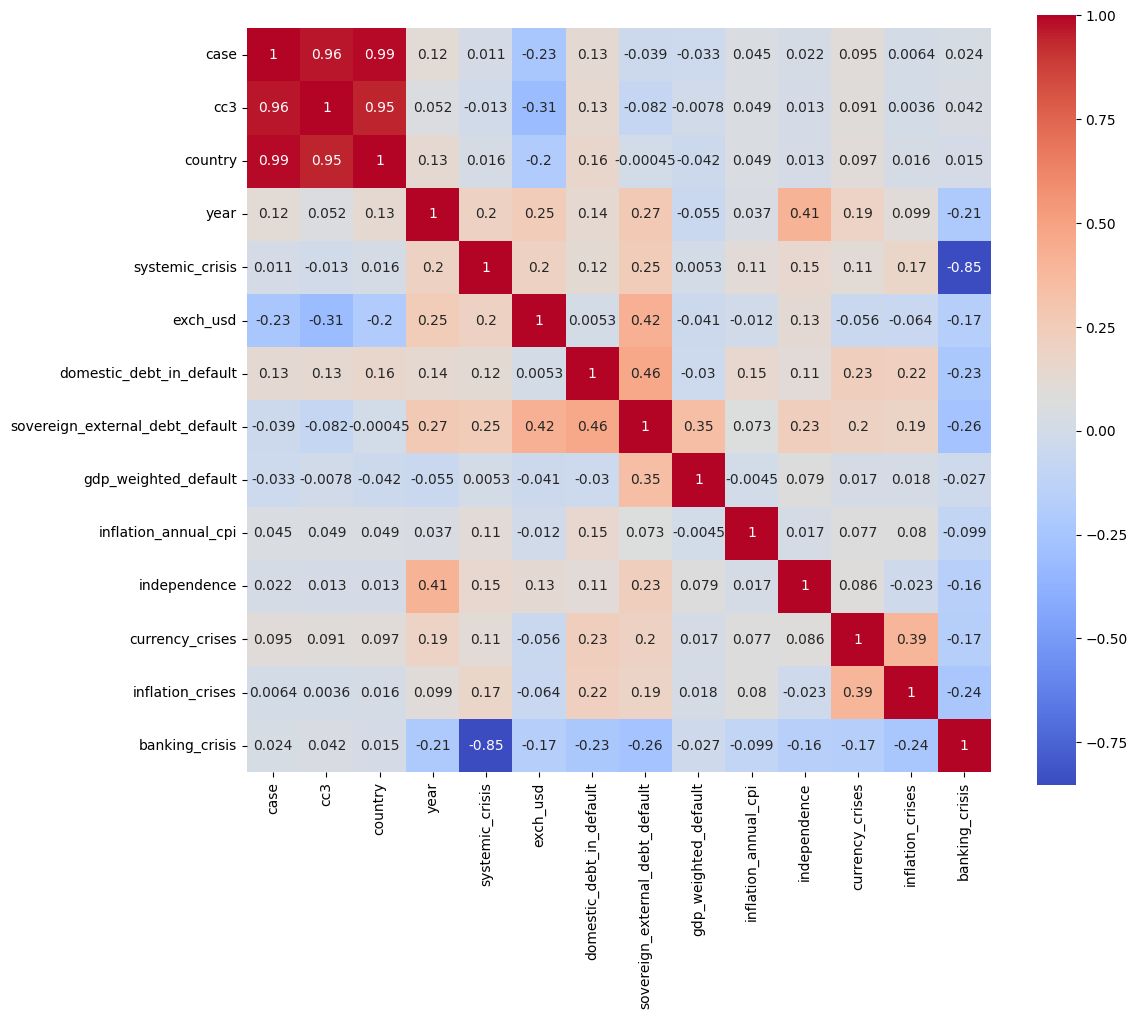

In [10]:
corr_matrix = dfq.corr()
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

# Calculate correlation with target


In [11]:
# Calculate correlation matrix
correlation_matrix = dfq.corr()

# Get correlations with target variable 'banking_crisis'
target_correlations = correlation_matrix['banking_crisis'].abs()

# Filter columns with correlation < 0.2
columns_to_drop = target_correlations[target_correlations < 0.2].index
columns_to_drop = columns_to_drop[columns_to_drop != 'banking_crisis']  # exclude target variable

# Drop columns
dfq_filtered_corr = dfq.drop(columns=columns_to_drop)

print(f"Dropped columns: {list(columns_to_drop)}")
print(f"Remaining columns: {dfq_filtered_corr.columns}")

print(f"Number of remaining columns: {len(dfq_filtered_corr.columns)}")

Dropped columns: ['case', 'cc3', 'country', 'exch_usd', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises']
Remaining columns: Index(['year', 'systemic_crisis', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'inflation_crises',
       'banking_crisis'],
      dtype='object')
Number of remaining columns: 6


### dfq_filtered_corr: 
it is a filtered quantum dataset resulting from correlation-based feature reduction. This dataset:
* Retains only the most relevant features with correlation coefficients below 0.8
* Maintains the original class balance and label information
* Has undergone standardization for compatibility with Quantum Machine Learning algorithms
* Serves as input for Quantum Machine Learning models, enabling efficient processing and analysis
#### Characteristics
* Reduced feature space
* Standardized data
* Balanced class distribution
* Optimized for Quantum Machine Learning computations

In [12]:
dfq_filtered_corr

,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,inflation_crises,banking_crisis
0,1870,1,0,0,0,0
1,1871,0,0,0,0,1
2,1872,0,0,0,0,1
3,1873,0,0,0,0,1
4,1874,0,0,0,0,1
...,...,...,...,...,...,...
1054,2009,1,1,1,0,0
1055,2010,0,1,1,0,1
1056,2011,0,1,1,0,1
1057,2012,0,1,1,0,1


# 2.**Principal Component Analysis (PCA)**: 
### Select top k principal components explaining most of the variance.


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # retain 95% of variance
dfq_filtered_pca = pca.fit_transform(dfq.drop(['banking_crisis'], axis=1))

In [14]:
dfq_filtered_pca

array([[-102.27841355,  -18.41620694,    1.01305105],
       [-101.29399201,  -18.58228248,    1.05353039],
       [-100.30802895,  -18.74875589,    1.06432099],
       ...,
       [  48.54020328,   27.66462765,   -1.47455007],
       [  49.5261664 ,   27.49815422,   -1.46375981],
       [  50.51212951,   27.33168079,   -1.4529697 ]])

In [16]:
# Convert array to DataFrame
dfq_filtered_pca = pd.DataFrame(dfq_filtered_pca)

In [17]:
# Add 'banking_crisis' column
dfq_filtered_pca['banking_crisis'] = dfq['banking_crisis']


### dfq_filtered_pca 
it is a filtered quantum dataset resulting from Principal Component Analysis (PCA)-based dimensionality reduction. This dataset:
* Retains 95% of the explained variance in the original data
* Transforms high-dimensional features into lower-dimensional principal components
* Maintains the original class balance and label information
* Has undergone standardization for compatibility with Quantum Machine Learning algorithms
#### Characteristics
* Reduced dimensionality
* Optimized feature representation
* Retained essential information
* Enhanced computational efficiency for Quantum Machine Learning tasks

In [47]:
dfq_filtered_pca

,0,1,2,banking_crisis
0,-102.278414,-18.416207,1.013051,0
1,-101.293992,-18.582282,1.053530,1
2,-100.308029,-18.748756,1.064321,1
3,-99.322066,-18.915229,1.075118,1
4,-98.336103,-19.081703,1.085908,1
...,...,...,...,...
1054,46.571451,27.998702,-1.454794,0
1055,47.555176,27.829317,-1.583930,1
1056,48.540203,27.664628,-1.474550,1
1057,49.526166,27.498154,-1.463760,1


# Reducing Samples

# Sample Reduction of Correlation Based Data Set

In [18]:
from sklearn.utils import resample

# Define sample size
sample_size = 500

# Stratified sampling (maintaining class balance)
dfq_sampled_corr = pd.concat([resample(dfq_filtered_corr[dfq_filtered_corr['banking_crisis'] == c], replace=False, n_samples=int(sample_size * len(dfq_filtered_corr[dfq_filtered_corr['banking_crisis'] == c]) / len(dfq_filtered_corr))) for c in dfq_filtered_corr['banking_crisis'].unique()])

In [19]:
dfq_sampled_corr

,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,inflation_crises,banking_crisis
414,1991,0,0,0,0,0
482,1992,1,0,0,1,0
1041,1996,1,0,0,0,0
690,1997,0,0,0,1,0
1042,1997,1,0,0,1,0
...,...,...,...,...,...,...
733,1925,0,0,0,0,1
535,1977,0,0,0,0,1
211,2006,0,0,1,0,1
1011,1966,0,1,1,0,1


# Sample Reduction of PCA Based Data Set

In [20]:

# Define sample size
sample_size = 500

# Stratified sampling (maintaining class balance)
dfq_sampled_pca = pd.concat([resample(dfq_filtered_pca[dfq_filtered_pca['banking_crisis'] == c], replace=False, n_samples=int(sample_size * len(dfq_filtered_pca[dfq_filtered_pca['banking_crisis'] == c]) / len(dfq_filtered_pca))) for c in dfq_filtered_pca['banking_crisis'].unique()])

In [21]:
dfq_sampled_pca

,0,1,2,banking_crisis
194,16.565223,-29.585591,-2.052796,0
485,26.707602,-5.439079,-0.472844,0
1053,45.606294,28.253344,4.428612,0
1051,43.594160,28.536728,0.680507,0
140,19.141962,-38.221207,-0.006071,0
...,...,...,...,...
931,14.785402,32.103459,0.036028,1
768,-4.175513,21.962893,0.594111,1
91,-45.943227,-27.232443,-0.683527,1
39,-4.664368,-34.898497,2.095655,1


# Splitting of Data Sets into Test and Train Samples

In [22]:
# Training and Testing for Corr Based Data
X=dfq_sampled_corr.drop('banking_crisis',axis=1)
y=dfq_sampled_corr['banking_crisis']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.20, random_state=40)

# Training and Testing of PCA based Data
X_pca=dfq_sampled_pca.drop('banking_crisis',axis=1)
y_pca=dfq_sampled_pca['banking_crisis']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y_pca, test_size=0.20, random_state=40)

# Feature Maps

# Featue Map For Corr Based Data

In [23]:
feature_dim = X_train_c.shape[1]

feature_map_c = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

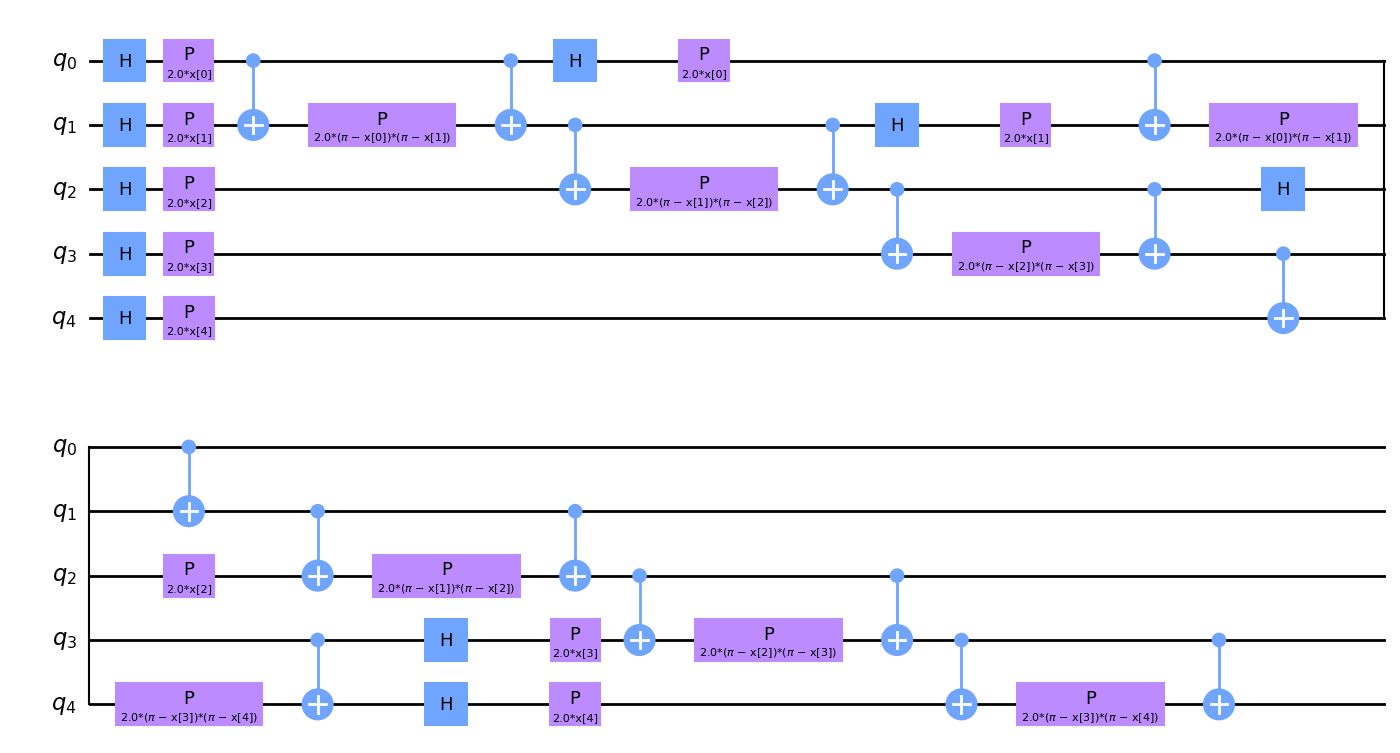

In [24]:
feature_map_c.decompose().draw(output="mpl", style="clifford", fold=20)

# Featue Map For PCA Based Data

In [25]:
feature_dim = X_train_p.shape[1]

feature_map_p = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

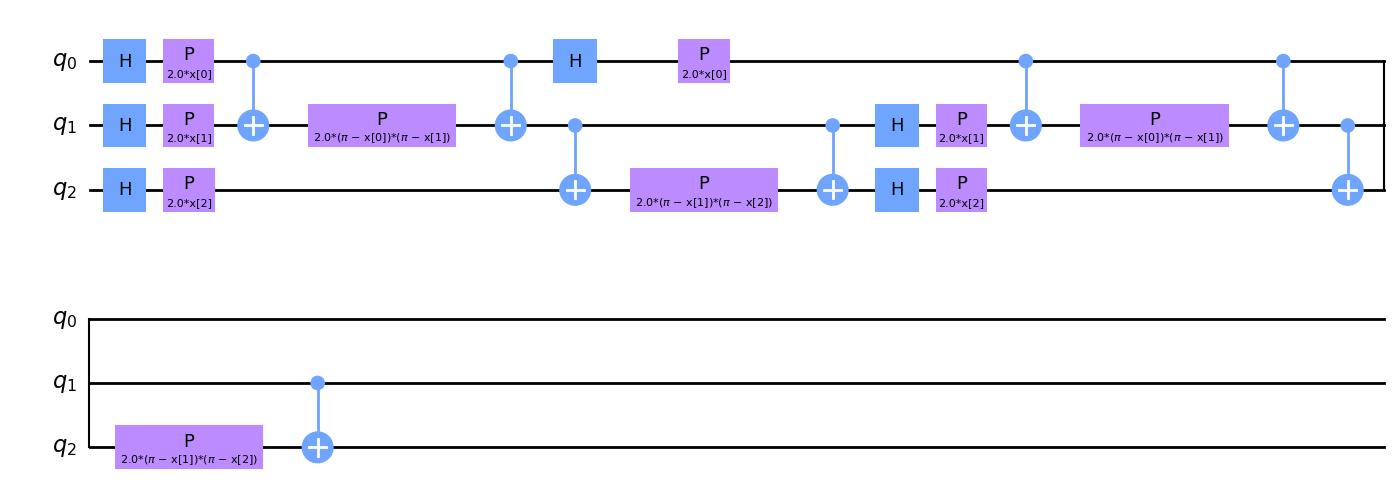

In [26]:
feature_map_p.decompose().draw(output="mpl", style="clifford", fold=20)

Setting Quantum Kernels for Correlation-Based and PCA-Based Data
====================================================================
Quantum Kernel for Correlation-Based Data
-----------------------------------------------
Description:<br>
I configured the Quantum Kernel for the correlation-based filtered dataset (dfq_filtered_corr).
##### Parameters
* kernel_name: QuantumKernelCorr
* dataset: dfq_filtered_corr
* feature_dimension: Number of features in dfq_filtered_corr


Quantum Kernel for PCA-Based Data
----------------------------------------
Description: <br>
I also configured the Quantum Kernel for the PCA-based filtered dataset (dfq_filtered_pca).
#### Parameters
* kernel_name: QuantumKernelPCA
* dataset: dfq_filtered_pca
* feature_dimension: Number of principal components in dfq_filtered_pca


In [27]:
sampler=Sampler()

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_17592\2810157668.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler=Sampler()


# Quantum Kernel (Correlation Based Data)

In [28]:
fidelity = ComputeUncompute(sampler=sampler)
q_kernel_corr = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_c)

# Quantum Kernel (PCA Based Data)

In [29]:
q_kernel_pca = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_p)

# Implementation of Quantum Computing Models

## Model No 01 VQC

### Data Pre Processing for VQC

In [35]:
# Data Set C
training_features_c = X_train_c.values
training_labels_c = y_train_c.values
test_features_c = X_test_c.values
test_labels_c = y_test_c.values

# Data Set P
training_features_p = X_train_p.values
training_labels_p = y_train_p.values
test_features_p = X_test_p.values
test_labels_p = y_test_p.values

In [36]:
ansatz_c = TwoLocal(feature_map_c.num_qubits, ["ry", "rz"], "cz", reps=3)
ansatz_p = TwoLocal(feature_map_p.num_qubits, ["ry", "rz"], "cz", reps=3)

In [37]:
optimizer = COBYLA(maxiter=50)
sampler = Sampler()
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(Iights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


C:\Users\SURFACE\AppData\Local\Temp\ipykernel_17592\1395080852.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


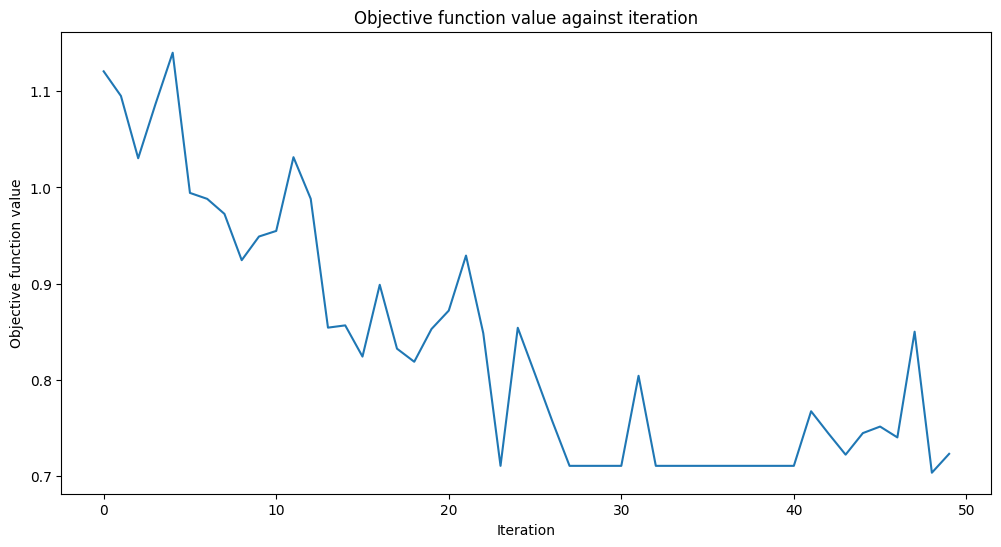

Training time: 185 seconds
Testing accuracy on Correlation Based Data: 0.98


In [38]:
import time
vqc_c = VQC(
    sampler=sampler,
    feature_map=feature_map_c,
    ansatz=ansatz_c,
    optimizer=optimizer,
    callback=callback_graph,
)


# clear objective value history
objective_func_vals = []

start = time.time()
vqc_c.fit(training_features_c, training_labels_c)

elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")
score_c = vqc_c.score(test_features_c, test_labels_c)

print(f"Testing accuracy on Correlation Based Data: {score:0.2f}")


In [39]:
training_predictions = vqc_c.predict(training_features_c)
training_accuracy = accuracy_score(training_labels_c, training_predictions)
training_f1 = f1_score(training_labels_c, training_predictions)
training_recall = recall_score(training_labels_c, training_predictions)


print(f"Training accuracy on Correlation Based Data: {training_accuracy:0.2f}")
print(f"Training F1 score on Correlation Based Data: {training_f1:0.2f}")
print(f"Training Recall on Correlation Based Data: {training_recall:0.2f}")

Training accuracy on Correlation Based Data: 0.92
Training F1 score on Correlation Based Data: 0.96
Training Recall on Correlation Based Data: 1.00


# Model No 02

# QSVC on Corr Based and PCA Based Kernel

In [41]:
import time
qsvc = QSVC(
    quantum_kernel=q_kernel_corr
)
start = time.time()
qsvc.fit(X_train_c, y_train_c)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc.score(X_test_c, y_test_c)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 666 seconds
QSVC classification test score: 0.94


In [45]:
y_pred_c = qsvc.predict(X_test_c)

accuracy = accuracy_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)

print(f"Model: QSVC on Correlation Based Data")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")

Model: QSVC on Correlation Based Data
  Accuracy: 0.9400
  F1 Score: 0.9663
  Precision: 0.9663
  Recall: 0.9663


In [46]:
import time
qsvc_PCA = QSVC(
    quantum_kernel=q_kernel_pca
)
start = time.time()
qsvc_PCA.fit(X_train_p, y_train_p)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc_PCA.score(X_test_p, y_test_p)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 568 seconds
QSVC classification test score: 0.89


In [58]:
y_pred_p = qsvc_PCA.predict(X_test_p)

accuracy = accuracy_score(y_test_p, y_pred_p)
f1 = f1_score(y_test_p, y_pred_p)
precision = precision_score(y_test_p, y_pred_p)
recall = recall_score(y_test_p, y_pred_p)

print(f"Model: QSVC on Correlation Based Data")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")

Model: QSVC on Correlation Based Data
  Accuracy: 0.8900
  F1 Score: 0.9418
  Precision: 0.8900
  Recall: 1.0000


In [49]:
# Evaluate training matrix
matrix_train = q_kernel_pca.evaluate(X_train_p)

# Evaluate testing matrix
matrix_test = q_kernel_pca.evaluate(X_test_p, X_train_p)

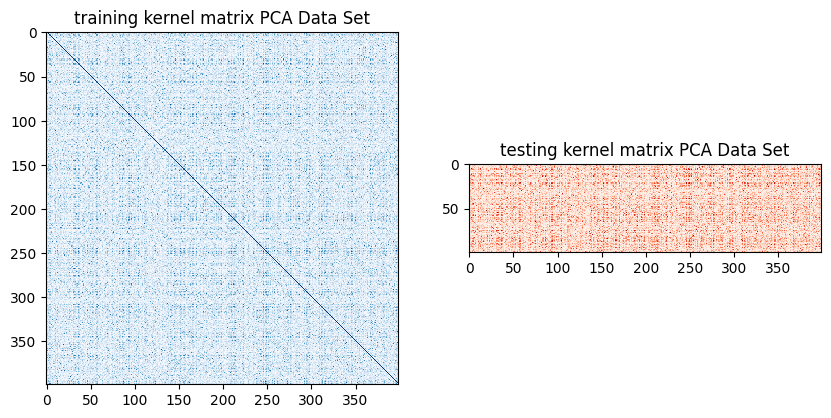

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("training kernel matrix PCA Data Set")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("testing kernel matrix PCA Data Set")

plt.show()

## Model Comparison

| **Model** | **Accuracy** | **F1 Score** | **Precision** | **Recall** |
| --- | --- | --- | --- | --- |
| Quantum Variational Classifier (VQC) | 0.98 | 0.92| 0.96 | 1.0000 |
| Quantum SVM on Correlation Data Set | 0.94 | 0.9663 | 0.9663| 0.9663 |
| Quantum SVM on PCA Data Set | 0.89 | 0.9418| 0.89 | 1.00 |

In [1]:
import platform
import psutil

# System Information
print("System Information:")
print(f"Platform: {platform.platform()}")
print(f"Processor: {platform.processor()}")
print(f"Operating System: {platform.system()}")
print(f"RAM: {psutil.virtual_memory().total / (1024.0 ** 3):.2f} GB")

# Memory Usage
print("\nMemory Usage:")
print(f"Current Memory Usage: {psutil.virtual_memory().percent}%")
print(f"Available Memory: {psutil.virtual_memory().available / (1024.0 ** 3):.2f} GB")

# Data Processing Metrics
print("\nData Processing Metrics:")
print(f"CPU Usage: {psutil.cpu_percent()}%")
print(f"Number of CPU Cores: {psutil.cpu_count()}")

System Information:
Platform: Windows-11-10.0.22000-SP0
Processor: Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
Operating System: Windows
RAM: 7.92 GB

Memory Usage:
Current Memory Usage: 73.5%
Available Memory: 2.10 GB

Data Processing Metrics:
CPU Usage: 64.1%
Number of CPU Cores: 4
